<a href="https://colab.research.google.com/github/rohanbhandari441/ML/blob/main/speaakerverif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

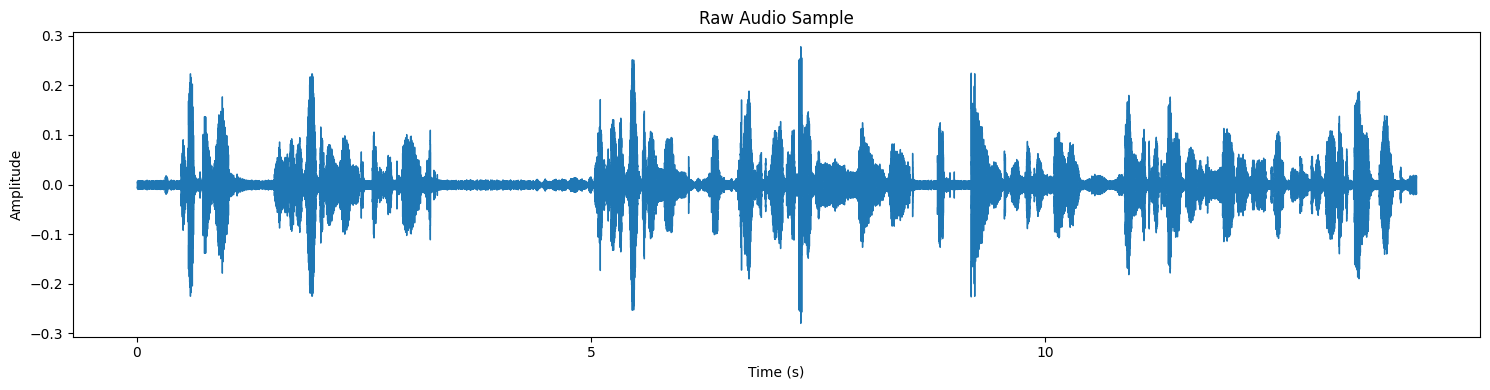

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the FLAC audio file
audio_path = '/content/drive/MyDrive/libri_final/103-1240-0000.flac'

# Load the audio file
audio, sr = librosa.load(audio_path, sr=None)

# Plot the raw audio waveform
plt.figure(figsize=(15, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Raw Audio Sample')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
!pip install pydub
from pydub import AudioSegment
import os

def cut_audio(input_path, output_dir, segment_length_ms=10000):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each file in the input directory
    for root, dirs, files in os.walk(input_path):
        for file in files:
            if file.endswith(".flac"):
                file_path = os.path.join(root, file)

                # Load the audio file
                audio = AudioSegment.from_file(file_path, format="flac")

                # Calculate the number of segments
                num_segments = len(audio) // segment_length_ms

                # Cut the audio into segments
                for i in range(num_segments):
                    start_time = i * segment_length_ms
                    end_time = (i + 1) * segment_length_ms

                    # Extract the segment
                    segment = audio[start_time:end_time]

                    # Output file name format: originalfilename_segmentNumber.flac
                    output_file_name = f"{os.path.splitext(file)[0]}_{i + 1}.flac"
                    output_path = os.path.join(output_dir, output_file_name)

                    # Save the segment
                    segment.export(output_path, format="flac")

# Example usage
input_directory = "/content/drive/MyDrive/libri_final"  # Update with your actual path
output_directory = "/content/drive/MyDrive/Libri_10k_cut"  # Update with your desired output path
cut_audio(input_directory, output_directory)


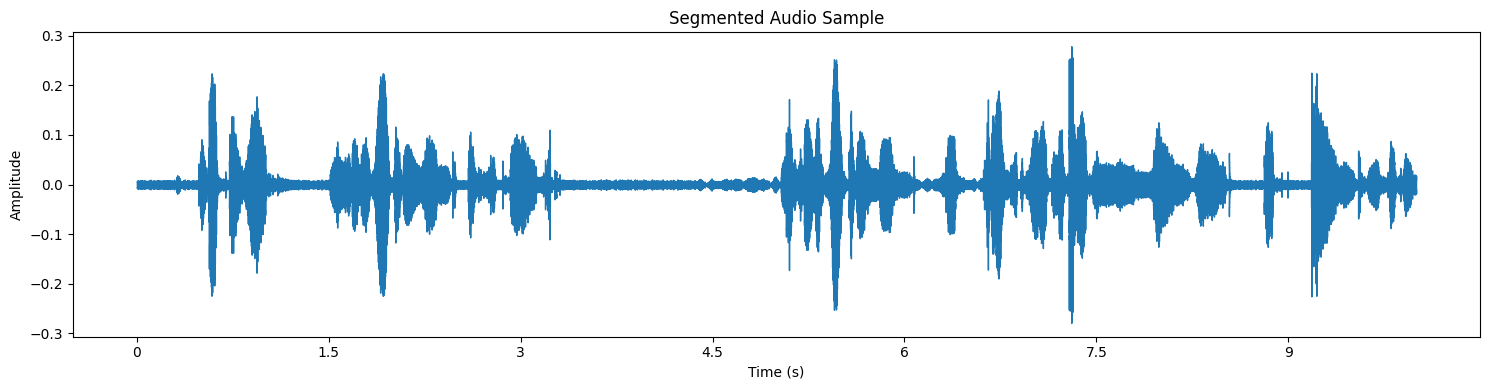

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the FLAC audio file
audio_path = '/content/drive/MyDrive/Libri_7k_cut/103-1240-0000_1.flac'

# Load the audio file
audio, sr = librosa.load(audio_path, sr=None)

# Plot the raw audio waveform
plt.figure(figsize=(15, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Segmented Audio Sample')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import librosa
import numpy as np

dataset_dir = '/content/drive/MyDrive/Libri_7k_cut'
fixed_length = 50000  # Set the desired fixed length in samples

def process_audio(audio_path, fixed_length):
    audio, _ = librosa.load(audio_path, sr=16000)

    # Truncate or pad the audio to the fixed length
    if len(audio) > fixed_length:
        audio = audio[:fixed_length]
    else:
        audio = np.pad(audio, (0, fixed_length - len(audio)))

    mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
    return mfccs

data = []
labels = []

for audio_file in os.listdir(dataset_dir):
    if audio_file.endswith('.flac'):
        audio_path = os.path.join(dataset_dir, audio_file)

        # Extract the first four characters of the file as the label
        speaker_label = int(audio_file[5:6])

        features = process_audio(audio_path, fixed_length)
        data.append(features)
        labels.append(speaker_label)

data = np.array(data)
labels = np.array(labels)

# Specify the output directories for data and labels
output_data_dir = '/content/drive/MyDrive/Libri_10k_data'
output_labels_dir = '/content/drive/MyDrive/Libri_10k_labels'

# Create output directories if they don't exist
os.makedirs(output_data_dir, exist_ok=True)
os.makedirs(output_labels_dir, exist_ok=True)

# Save data and labels to separate files
np.save(os.path.join(output_data_dir, 'data.npy'), data)
np.save(os.path.join(output_labels_dir, 'labels.npy'), labels)


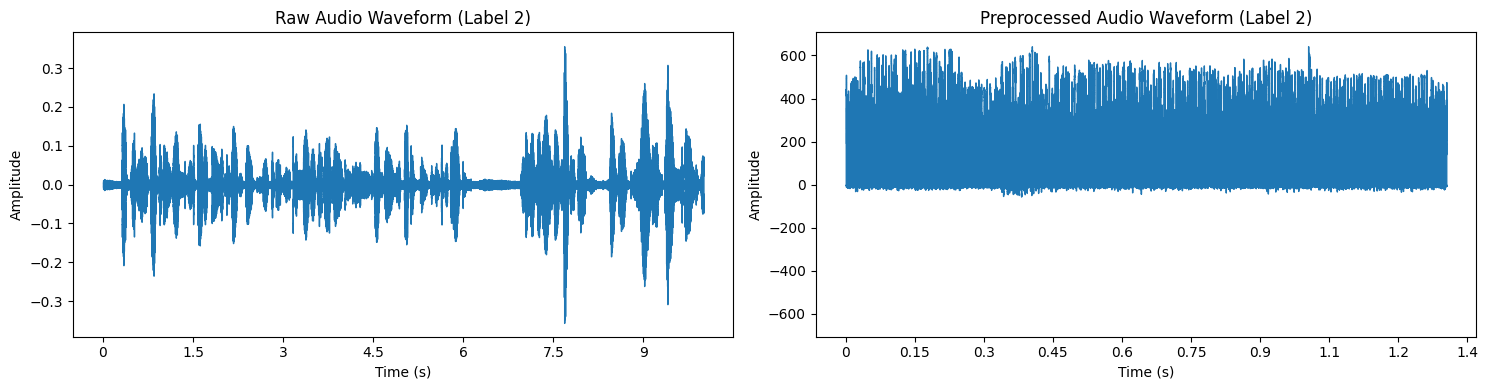

In [ ]:
import librosa.display
import os
import matplotlib.pyplot as plt

# Choose the label to visualize
label_to_visualize = 2

# Find the first audio file with the specified label
file_to_visualize = next(file for file in os.listdir(dataset_dir) if file.endswith('.flac') and int(file[5:6]) == label_to_visualize)
audio_path_to_visualize = os.path.join(dataset_dir, file_to_visualize)

# Load and plot the waveform of the original audio file
audio_original, _ = librosa.load(audio_path_to_visualize, sr=16000)
plt.figure(figsize=(15, 4))

# Plot the raw audio waveform
plt.subplot(1, 2, 1)
librosa.display.waveshow(audio_original, sr=16000)
plt.title(f'Raw Audio Waveform (Label {label_to_visualize})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Load preprocessed audio data and labels
data_file_to_visualize = os.path.join(output_data_dir, 'data.npy')
labels_file_to_visualize = os.path.join(output_labels_dir, 'labels.npy')

# Load the data and labels
data = np.load(data_file_to_visualize)
labels = np.load(labels_file_to_visualize)

# Select the indices corresponding to label 2
indices_label_2 = np.where(labels == label_to_visualize)[0]

# Concatenate the features of all instances labeled as 2
features_to_visualize = np.concatenate([data[i] for i in indices_label_2], axis=1)

# Plot the preprocessed waveform
plt.subplot(1, 2, 2)
librosa.display.waveshow(features_to_visualize, sr=16000)
plt.title(f'Preprocessed Audio Waveform (Label {label_to_visualize})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 96, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 46, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 23, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 21, 256)        295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 10, 256)        0

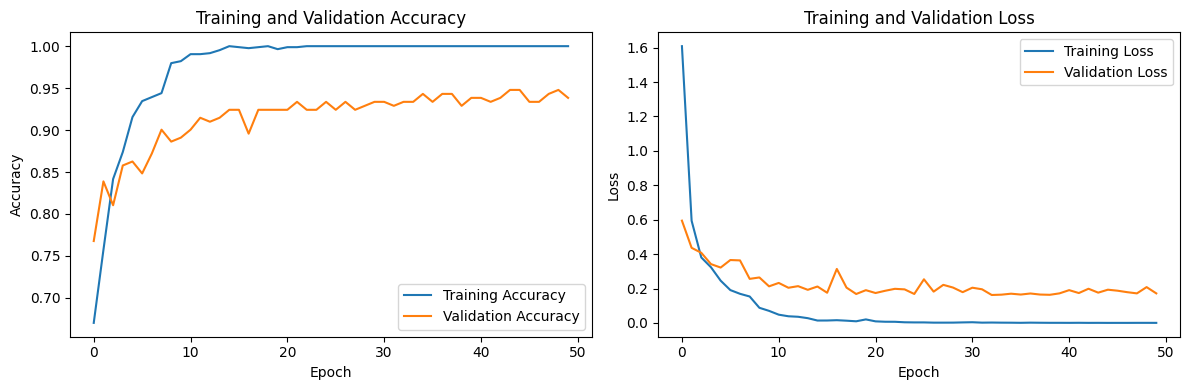

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load the extracted MFCC features and labels
data = np.load('/content/drive/MyDrive/Libri_7k_data/data.npy')
labels = np.load('/content/drive/MyDrive/Libri_7k_labels/labels.npy')

# Encode speaker labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)

# Reshape the data to match the input shape expected by CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define the CNN model with increased complexity
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
tf.keras.backend.clear_session()


# Print the summary of the model architecture
model.summary()

# Compile the model with a smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with increased epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()




In [ ]:
import cv2

# Load the blurred image
blurry_image = cv2.imread('/content/sample_data/image.jpg')

# Apply deblurring algorithm
deblurred_image = cv2.deblur(image=blurry_image, kernelSize=(5, 5))

# Save the deblurred image
cv2.imwrite('deblurred_image.jpg', deblurred_image)

# Display the deblurred image
cv2.imshow('Deblurred Image', deblurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
